In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE
import umap

In [7]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_combined_fs_z = pd.read_csv(os.path.join(folder_path, "features_combined_fs_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_combined_fs_mm = pd.read_csv(os.path.join(folder_path, "features_combined_fs_minmax.csv"))

#se quitan las columnas 'filename' y 'label'
df_combined_fs_mm_cl= df_combined_fs_mm.drop(columns=['filename', 'label'])
df_combined_fs_z_cl= df_combined_fs_z.drop(columns=['filename', 'label'])

In [8]:
df_combined_fs_mm_cl

,area,eccentricity,extent,solidity,major_axis_length,mean_magnitude,std_magnitude,low_freq_magnitude,high_freq_magnitude
0,0.164032,0.840083,0.448592,0.749355,0.358292,0.321215,0.291837,0.274240,0.234906
1,0.297348,0.841452,0.301952,0.441238,0.592452,0.382919,0.518457,0.426258,0.434512
2,0.153903,0.660993,0.769458,0.939005,0.262267,0.312000,0.223125,0.276983,0.271077
3,0.201746,0.719967,0.779886,0.879431,0.338620,0.330273,0.286785,0.350592,0.333820
4,0.055665,0.459722,0.750210,0.929210,0.105664,0.205450,0.131972,0.174341,0.197968
...,...,...,...,...,...,...,...,...,...
532,0.527668,0.470665,0.497607,0.624936,0.598448,0.577865,0.616550,0.609478,0.557612
533,0.619565,0.375058,0.644869,0.735823,0.596513,0.621211,0.585545,0.694047,0.625742
534,0.553195,0.638007,0.538548,0.678224,0.639816,0.600359,0.593093,0.565160,0.520888
535,0.509140,0.534958,0.298279,0.481038,0.657953,0.604393,0.724002,0.578277,0.576949


In [9]:
bandwidth_estimate = estimate_bandwidth(df_combined_fs_z_cl.values, quantile=0.2)
print("Estimated bandwidth:", bandwidth_estimate)

Estimated bandwidth: 2.425538629950448


In [10]:
bandwidth_values = [2.368, 2.4255, 2]

for bw in bandwidth_values:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(df_combined_fs_z_cl.values)
    labels = ms.labels_
    n_clusters = len(np.unique(labels))
    
    if n_clusters > 1:  # Solo tiene sentido calcular Silhouette si hay más de 1 clúster
        score = silhouette_score(df_combined_fs_z_cl.values, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 2.37 | Clusters: 2 | Silhouette Score: 0.388
Bandwidth: 2.43 | Clusters: 1 | Silhouette Score: N/A (solo 1 clúster)
Bandwidth: 2.00 | Clusters: 5 | Silhouette Score: 0.290


In [11]:
bandwidth = 2.37
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_combined_fs_z_cl.values)
labels = ms.labels_
n_clusters = len(np.unique(labels))
print(f"Clusters: {n_clusters}")

Clusters: 2


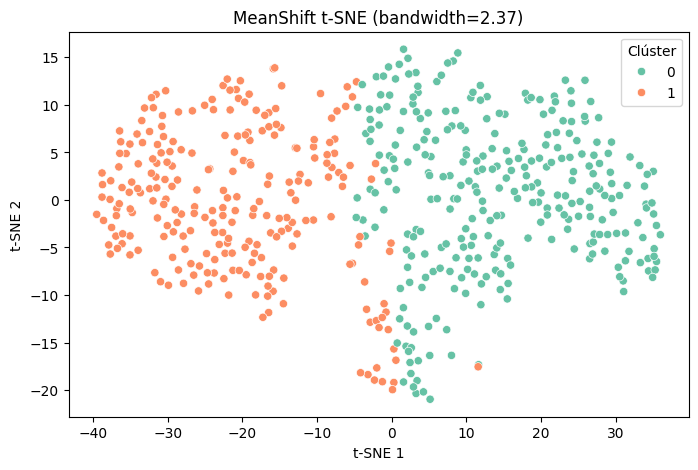

In [12]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_combined_fs_z_cl.values)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='Set2')
plt.title(f'MeanShift t-SNE (bandwidth={bandwidth})')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Clúster')
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


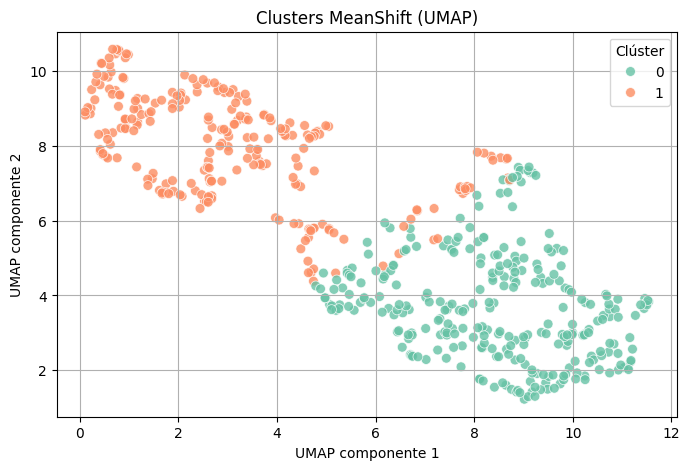

In [13]:
reducer = umap.UMAP(n_neighbors=10, n_components=2, random_state=42)
X_umap_z = reducer.fit_transform(df_combined_fs_z_cl)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_umap_z[:, 0],
    y=X_umap_z[:, 1],
    hue=labels,        
    palette='Set2',
    s=50,
    alpha=0.8
)
plt.title('Clusters MeanShift (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [14]:
score_z = silhouette_score(df_combined_fs_z_cl, labels)
print(f"Silhouette Score: {score_z:.3f}")

Silhouette Score: 0.388


In [15]:
# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_combined_fs_z['filename'],
    'label': df_combined_fs_z['label'],
    'cluster': labels
})

# Tabla de contingencia: comparación entre etiquetas originales y clústeres
tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])
print("Tabla de contingencia entre etiquetas originales y clústeres:")
print(tabla_contingencia)



Tabla de contingencia entre etiquetas originales y clústeres:
cluster    0    1
label            
higher   240   28
smaller   52  217


se hace lo mismo con normalizacion min-max:

In [16]:
bandwidth_estimate_mm = estimate_bandwidth(df_combined_fs_mm_cl.values, quantile=0.2)
print("Estimated bandwidth:", bandwidth_estimate_mm)

Estimated bandwidth: 0.44250033076680734


In [17]:
bandwidth_values = [0.44, 0.39, 0.45]

for bw in bandwidth_values:
    ms_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_mm.fit(df_combined_fs_mm_cl.values)
    labels_mm = ms_mm.labels_
    n_clusters_mm = len(np.unique(labels_mm))
    
    if n_clusters_mm > 1:
        score = silhouette_score(df_combined_fs_mm_cl.values, labels_mm)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters_mm} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 0.44 | Clusters: 2 | Silhouette Score: 0.406
Bandwidth: 0.39 | Clusters: 4 | Silhouette Score: 0.312
Bandwidth: 0.45 | Clusters: 2 | Silhouette Score: 0.406


In [18]:
bandwidth = bandwidth_estimate_mm
meanshift_mm = MeanShift(bandwidth=bandwidth)
meanshift_mm.fit(df_combined_fs_mm_cl.values)
labels_mm = meanshift_mm.labels_

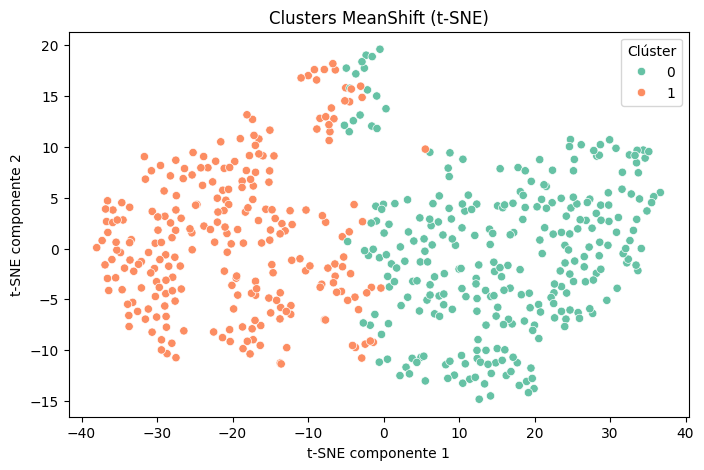

In [19]:
tsne_mm = TSNE(n_components=2, random_state=42)
X_tsne_mm = tsne_mm.fit_transform(df_combined_fs_mm_cl.values)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_mm[:, 0], y=X_tsne_mm[:, 1], hue=labels_mm, palette='Set2')
plt.title('Clusters MeanShift (t-SNE)')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_combined_fs_mm['filename'],
    'label': df_combined_fs_mm['label'],
    'cluster': labels_mm
})

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


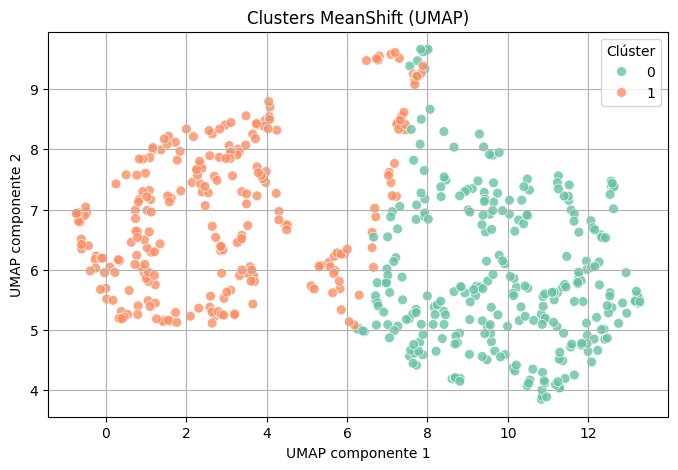

In [20]:
reducer = umap.UMAP(n_neighbors=9, n_components=2, random_state=42)
X_umap_mm = reducer.fit_transform(df_combined_fs_mm_cl)


plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_umap_mm[:, 0],
    y=X_umap_mm[:, 1],
    hue=labels_mm,        
    palette='Set2',
    s=50,
    alpha=0.8
)
plt.title('Clusters MeanShift (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [21]:
score_mm = silhouette_score(df_combined_fs_mm_cl, labels)
print(f"Silhouette Score: {score_mm:.3f}")

Silhouette Score: 0.405


In [22]:
tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])
print(tabla_contingencia)

cluster    0    1
label            
higher   243   25
smaller   46  223


voy a probar hacerle reduccion de dimensionalidad con umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_9564\3385157423.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


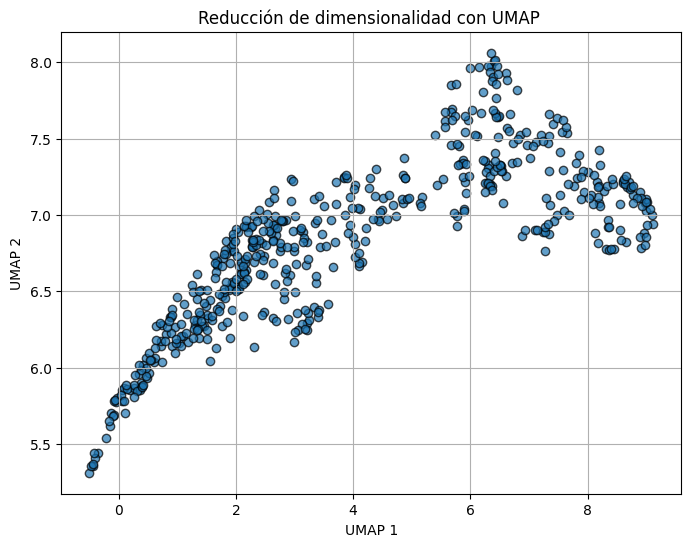

In [85]:
# Reduccion de la dimensionalidad con UMAP
umap_model_z = umap.UMAP(n_neighbors=11,n_components=4, random_state=42) #11
X_umap_z = umap_model_z.fit_transform(df_combined_fs_z_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_z[:, 0], X_umap_z[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [86]:
# Estimación del bandwidth
bandwidth_umap = estimate_bandwidth(X_umap_z, quantile=0.2, n_samples=500)

# Ajuste de MeanShift
ms_umap = MeanShift(bandwidth=bandwidth_umap, bin_seeding=True)
ms_umap.fit(X_umap_z)
labels_umap = ms_umap.labels_  
n_clusters = len(np.unique(labels_umap))

# Contar los elementos en cada clúster
unique, counts = np.unique(labels_umap, return_counts=True)

# Mostrar resultados solo si hay más de un clúster y los clústeres son adecuados
if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(X_umap_z, labels_umap)
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth_umap:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 2.078 | Clusters: 2 | Silhouette Score: 0.608


In [87]:
bandwidth_values_umap = [2.403, 2, 2.5, 2.6, 2.9 ,3, 2.65, 3.88, 2.79, 3.9,4.1, 1.8,]

for bw in bandwidth_values_umap:
    ms_umap = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_umap.fit(X_umap_z)
    labels_umap = ms_umap.labels_
    n_clusters = len(np.unique(labels_umap))
    
    if n_clusters > 1:  # 
        score = silhouette_score(X_umap_z, labels_umap)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 2.40 | Clusters: 2 | Silhouette Score: 0.609
Bandwidth: 2.00 | Clusters: 2 | Silhouette Score: 0.605
Bandwidth: 2.50 | Clusters: 2 | Silhouette Score: 0.610
Bandwidth: 2.60 | Clusters: 2 | Silhouette Score: 0.610
Bandwidth: 2.90 | Clusters: 2 | Silhouette Score: 0.611
Bandwidth: 3.00 | Clusters: 2 | Silhouette Score: 0.611
Bandwidth: 2.65 | Clusters: 2 | Silhouette Score: 0.611
Bandwidth: 3.88 | Clusters: 2 | Silhouette Score: 0.611
Bandwidth: 2.79 | Clusters: 2 | Silhouette Score: 0.611
Bandwidth: 3.90 | Clusters: 2 | Silhouette Score: 0.611
Bandwidth: 4.10 | Clusters: 2 | Silhouette Score: 0.608
Bandwidth: 1.80 | Clusters: 4 | Silhouette Score: 0.348


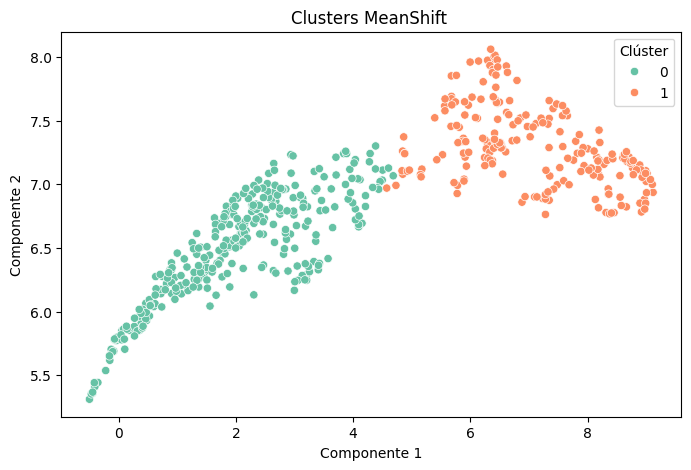

        filename    label  cluster
0    callo_1.png  smaller        1
1   callo_10.png  smaller        0
2  callo_100.png  smaller        1
3  callo_101.png  smaller        1
4  callo_102.png  smaller        1


In [88]:
bandwidth_def = 2.9
meanshift_z = MeanShift(bandwidth=bandwidth_def, bin_seeding=True)
meanshift_z.fit(X_umap_z) 
labels_umap = meanshift_z.labels_  

# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_z[:, 0], y=X_umap_z[:, 1], hue=labels_umap, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_combined_fs_z['filename'],
    'label': df_combined_fs_z['label'],
    'cluster': labels_umap  # Usamos las etiquetas generadas en la última ejecución
})

# Mostrar primeras filas
print(df_resultado.head())

In [89]:
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df_resultado['label'], df_resultado['cluster'])

# Mostrar la tabla
print(tabla_contingencia)


cluster    0    1
label            
higher   248   20
smaller   78  191


la gráfica se ve un poco mejor pero solo eso

min-max con umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_9564\197315170.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


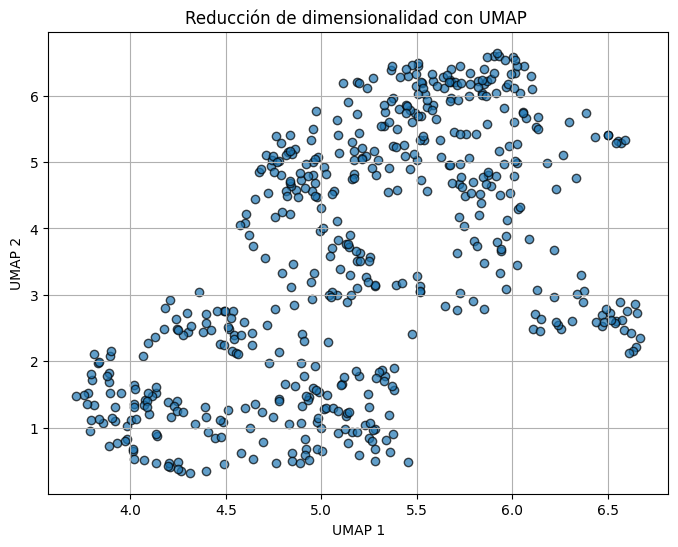

In [80]:
# Reduccion de la dimensionalidad con UMAP
umap_model_mm = umap.UMAP(n_neighbors=35, n_components=4, random_state=42)
X_umap_mm = umap_model_mm.fit_transform(df_combined_fs_mm_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [81]:
# Estimación del bandwidth
bandwidth_umap_mm = estimate_bandwidth(X_umap_mm, quantile=0.2, n_samples=500)

# Ajuste de MeanShift
ms_umap_mm = MeanShift(bandwidth=bandwidth_umap_mm, bin_seeding=True)
ms_umap_mm.fit(X_umap_mm)
labels_umap_mm = ms_umap_mm.labels_  
n_clusters = len(np.unique(labels_umap_mm))

# Contar los elementos en cada clúster
unique, counts = np.unique(labels_umap_mm, return_counts=True)


if n_clusters > 1 and all(count > 1 for count in counts):
    score = silhouette_score(X_umap_mm, labels_umap_mm)
    print(f"Auto Bandwidth: {bandwidth_umap_mm:.3f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
else:
    print(f"Auto Bandwidth: {bandwidth_umap_mm:.3f} | Clusters: {n_clusters} | Silhouette Score: N/A (clústeres demasiado pequeños)")

Auto Bandwidth: 1.742 | Clusters: 2 | Silhouette Score: 0.608


In [82]:
bandwidth_values_umap_mm = [2.5, 2, 2.3, 2.56, 2.54, 3, 2.78, 2.75, 2.9, 3.1, 3.15, 3.24, 3.3, 3.35,3.36, 3.365,1.78]

for bw in bandwidth_values_umap_mm:
    ms_umap_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_umap_mm.fit(X_umap_mm)
    labels_umap_mm = ms_umap_mm.labels_
    n_clusters = len(np.unique(labels_umap_mm))
    
    if n_clusters > 1:  # 
        score = silhouette_score(X_umap_mm, labels_umap_mm)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 2.50 | Clusters: 2 | Silhouette Score: 0.614
Bandwidth: 2.00 | Clusters: 2 | Silhouette Score: 0.611
Bandwidth: 2.30 | Clusters: 2 | Silhouette Score: 0.611
Bandwidth: 2.56 | Clusters: 2 | Silhouette Score: 0.614
Bandwidth: 2.54 | Clusters: 2 | Silhouette Score: 0.613
Bandwidth: 3.00 | Clusters: 2 | Silhouette Score: 0.616
Bandwidth: 2.78 | Clusters: 2 | Silhouette Score: 0.549
Bandwidth: 2.75 | Clusters: 2 | Silhouette Score: 0.616
Bandwidth: 2.90 | Clusters: 2 | Silhouette Score: 0.616
Bandwidth: 3.10 | Clusters: 2 | Silhouette Score: 0.616
Bandwidth: 3.15 | Clusters: 2 | Silhouette Score: 0.615
Bandwidth: 3.24 | Clusters: 2 | Silhouette Score: 0.614
Bandwidth: 3.30 | Clusters: 2 | Silhouette Score: 0.613
Bandwidth: 3.35 | Clusters: 2 | Silhouette Score: 0.611
Bandwidth: 3.36 | Clusters: 2 | Silhouette Score: 0.611
Bandwidth: 3.37 | Clusters: 2 | Silhouette Score: 0.611
Bandwidth: 1.78 | Clusters: 2 | Silhouette Score: 0.611


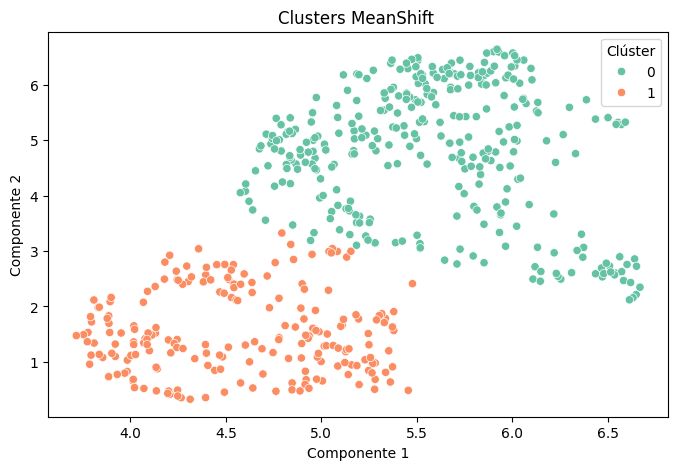

In [83]:
bandwidth_def_mm = 3
meanshift_mm = MeanShift(bandwidth=bandwidth_def_mm, bin_seeding=True)
meanshift_mm.fit(X_umap_mm) 
labels_umap_mm = meanshift_mm.labels_  

# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_mm[:, 0], y=X_umap_mm[:, 1], hue=labels_umap_mm, palette='Set2')
plt.title('Clusters MeanShift ')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado_mm_umap = pd.DataFrame({
    'filename': df_combined_fs_mm['filename'],
    'label': df_combined_fs_mm['label'],
    'cluster': labels_umap_mm  
})



In [84]:
tabla_contingencia_mm_umap = pd.crosstab(df_resultado_mm_umap['label'], df_resultado_mm_umap['cluster'])
print(tabla_contingencia_mm_umap)


cluster    0    1
label            
higher   251   17
smaller   78  191
